# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
LIVINGAREA_AVG = app_train.dropna(subset = ['LIVINGAREA_AVG'])

In [6]:
interval = pd.cut(LIVINGAREA_AVG.LIVINGAREA_AVG, 4)
app_train['LIVINGAREA_AVG_INTERVAL'] = interval

In [7]:
group = app_train.groupby('LIVINGAREA_AVG_INTERVAL').mean()
group

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
LIVINGAREA_AVG_INTERVAL,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 0.25]",278165.980071,0.071497,0.101859,0.320938,0.703485,0.391778,177538.410156,614834.752281,27753.567388,554356.027680,...,0.000686,0.000636,0.000357,0.006677,0.007601,0.035307,0.307270,0.268677,1.897005,0.177086
"(0.25, 0.5]",280676.506995,0.054879,0.111111,0.358877,0.701237,0.370521,205448.561958,679340.133631,30650.713351,616325.674160,...,0.000542,0.000632,0.000361,0.007734,0.008972,0.033000,0.398268,0.265030,1.805919,0.164275
"(0.5, 0.75]",276335.739390,0.046025,0.113568,0.373580,0.708906,0.386133,219777.035864,703241.104304,32309.682606,643400.450957,...,0.001793,0.000000,0.000000,0.009085,0.017470,0.036338,0.449336,0.241090,1.798043,0.161387
"(0.75, 1.0]",277317.610870,0.050000,0.152174,0.371739,0.741304,0.402174,253798.141304,773932.959783,35420.439130,709268.478261,...,0.000000,0.000000,0.000000,0.010050,0.012563,0.020101,0.389447,0.226131,1.653266,0.139130


Text(0.5,1,'Failure to Repay by Living area Group')

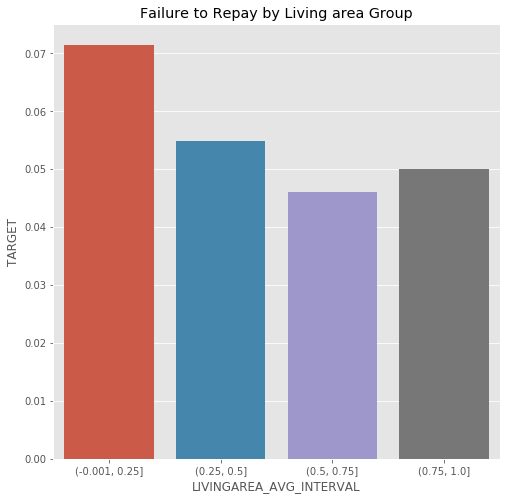

In [8]:
plt.style.use('ggplot')

plt.figure(figsize = (8, 8))

import seaborn as sns

px = group.index
py = group.TARGET

sns.barplot(px, py)
plt.title('Failure to Repay by Living area Group')